In [1]:
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 灰度直方图 
def classify_gray_hist(image1,image2,size =(256,256)): 
 # 计算直方图 
 # 直接用灰度图计算直方图，使用第一个通道 
 # bins 取为16 
 image1 = cv2.resize(image1,size) 
 image2 = cv2.resize(image2,size) 
 hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
 hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
 # 比较直方图 
 plt.plot(range(256),hist1,'r') 
 plt.plot(range(256),hist2,'b') 
 plt.show() 
 # 计算直方图的重合度 
 degree = 0
 for i in range(len(hist1)): 
  if hist1[i] != hist2[i]: 
   degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
  else: 
   degree = degree + 1
 degree = degree/len(hist1) 
 return degree 

In [3]:
# 计算单通道的直方图的相似值 
def calculate(image1,image2): 
 hist1 = cv2.calcHist([image1],[0],None,[256],[0.0,255.0]) 
 hist2 = cv2.calcHist([image2],[0],None,[256],[0.0,255.0]) 
  # 计算直方图的重合度 
 degree = 0
 for i in range(len(hist1)): 
  if hist1[i] != hist2[i]: 
   degree = degree + (1 - abs(hist1[i]-hist2[i])/max(hist1[i],hist2[i])) 
  else: 
   degree = degree + 1
 degree = degree/len(hist1) 
 return degree 
  
# 通过得到每个通道的直方图来计算相似度 
def classify_hist_with_split(image1,image2,size = (256,256)): 
 # 将图像resize后，分离为三个通道，再计算每个通道的相似值 
 image1 = cv2.resize(image1,size) 
 image2 = cv2.resize(image2,size) 
 sub_image1 = cv2.split(image1) 
 sub_image2 = cv2.split(image2) 
 sub_data = 0
 for im1,im2 in zip(sub_image1,sub_image2): 
  sub_data += calculate(im1,im2) 
 sub_data = sub_data/3
 return sub_data 

In [4]:
# 平均哈希算法计算
def classify_aHash(image1,image2): 
 image1 = cv2.resize(image1,(8,8)) 
 image2 = cv2.resize(image2,(8,8)) 
 gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
 gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
 hash1 = getHash(gray1) 
 hash2 = getHash(gray2) 
 return Hamming_distance(hash1,hash2) 

def classify_pHash(image1,image2): 
 image1 = cv2.resize(image1,(32,32)) 
 image2 = cv2.resize(image2,(32,32)) 
 gray1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY) 
 gray2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY) 
 # 将灰度图转为浮点型，再进行dct变换 
 dct1 = cv2.dct(np.float32(gray1)) 
 dct2 = cv2.dct(np.float32(gray2)) 
 # 取左上角的8*8，这些代表图片的最低频率 
 # 在python中进行掩码操作，直接取出图像矩阵的某一部分 
 dct1_roi = dct1[0:8,0:8] 
 dct2_roi = dct2[0:8,0:8] 
 hash1 = getHash(dct1_roi) 
 hash2 = getHash(dct2_roi) 
 return Hamming_distance(hash1,hash2) 

# 输入灰度图，返回hash 
def getHash(image): 
 avreage = np.mean(image) 
 hash = [] 
 for i in range(image.shape[0]): 
  for j in range(image.shape[1]): 
   if image[i,j] > avreage: 
    hash.append(1) 
   else: 
    hash.append(0) 
 return hash

# 计算汉明距离----汉明距离越小，则代表相似度越高。汉明距离为0，即代表两张图片完全一样
def Hamming_distance(hash1,hash2): 
 num = 0
 for index in range(len(hash1)): 
  if hash1[index] != hash2[index]: 
   num += 1
 return num 

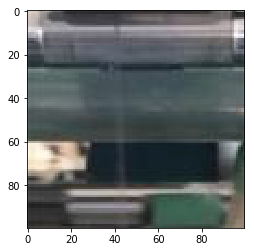

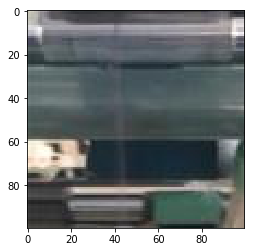

In [5]:
img_1=Image.open("/home/gavin/cov/prediction/1.jpg")
plt.figure(1)
plt.imshow(img_1)

img_2=Image.open("/home/gavin/cov/prediction/2.jpg")
plt.figure(2)
plt.imshow(img_2)

plt.show()

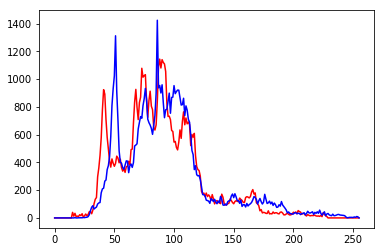

灰度直方图相似度:[0.60575676]
单通道直方图相似度:[0.67062443]
平均哈希算法a得到的汉明距离:9
平均哈希算法b得到的汉明距离:5


In [6]:
if __name__ == '__main__': 
 img1 = cv2.imread("./prediction/4.jpg")
 img2 = cv2.imread("./prediction/5.jpg")   
 degree = classify_gray_hist(img1,img2) 
 degree1 = classify_hist_with_split(img1,img2) 
 degree2 = classify_aHash(img1,img2) 
 degree3 = classify_pHash(img1,img2)
    
 print("灰度直方图相似度:" + str(degree) )
 print("单通道直方图相似度:" + str(degree1)) 
 print("平均哈希算法a得到的汉明距离:" + str(degree2))
 print("平均哈希算法b得到的汉明距离:" + str(degree3))
 cv2.waitKey(0)

In [7]:
if degree >= 0.8:
     print('灰度直方图：两张图片一样')
else:
     print ('灰度直方图：两张图片不一样')
        
if degree1 >= 0.8:
     print('单通道直方图：两张图片一样')
else:
     print('单通道直方图：两张图片不一样')
        
if degree2 <= 1:
     print('平均哈希算法a：两张图片一样')
else:
     print('平均哈希算法a：两张图片不一样')
        
if degree3 <= 1:
     print('平均哈希算法b：两张图片一样')
else:
     print('平均哈希算法b：两张图片不一样')    

灰度直方图：两张图片不一样
单通道直方图：两张图片不一样
平均哈希算法a：两张图片不一样
平均哈希算法b：两张图片不一样
